<a href="https://colab.research.google.com/github/FlavioOliveiraNeto/flavio_oliveira_neto_lia1/blob/main/Entregas%20-%20Flavio_Oliveira_Neto/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Ponta a Ponta - Construindo um Modelo com Tensorflow - Cifar-10
Problema: construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando 10 categorias, sendo: airplane; automobile; bird; cat; deer; dog; frog; horse; ship; truck.

Não há mágica. Há matemática! 🧙

# Fonte de dados

#### O conjunto de dados CIFAR-10 consiste em 60.000 imagens coloridas (32x32) em 10 classes, com 6.000 imagens por classe. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.

#### Edit 1: Foi feito o teste usando o conjunto de dados MNIST

In [ ]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
# Carrega o dataset CIFAR-10 - Já está no Keras!
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Classes das imagens
nomes_classes = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [ ]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [ ]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i]])
    plt.show()

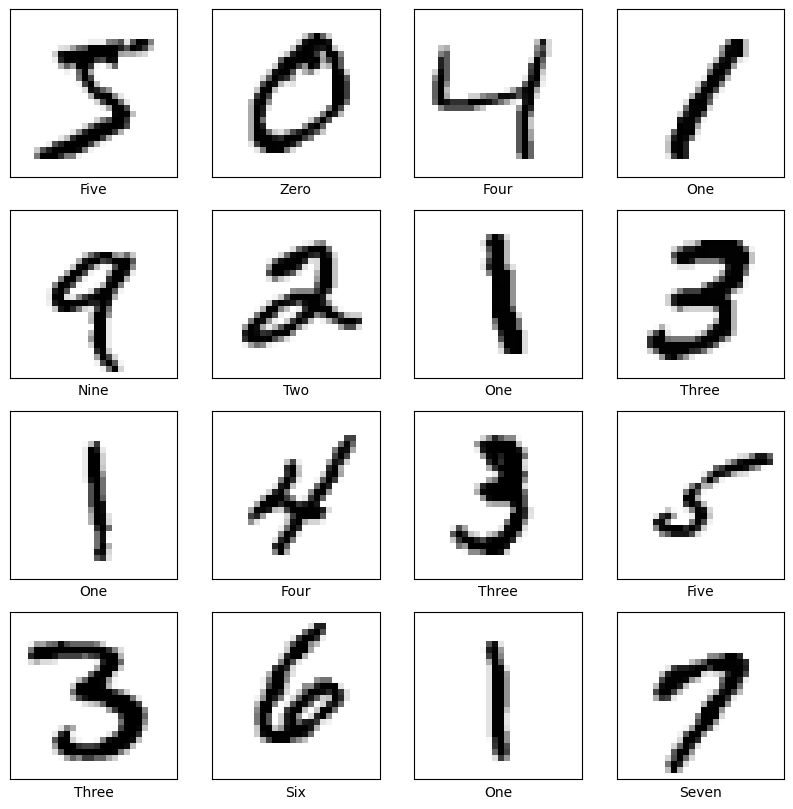

In [ ]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

##Construindo a Rede Neural Convolucional
O Keras é uma biblioteca do TensorFlow.

In [ ]:
# Arquitetura do Modelo -> Feature Learning

# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

### adam - é um algoritmo de aprendizagem tipo backpropagation!
### loss - função de erro. Isso se resume a uma otimização função matemática!
### metrics - medir o sucesso!

In [69]:
# Executando o treinamento
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 5,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.0661 - val_accuracy: 0.9900
Epoch 2/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0883 - val_accuracy: 0.9872
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.0705 - val_accuracy: 0.9877
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0865 - val_accuracy: 0.9863
Epoch 5/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0865 - val_accuracy: 0.9871
CPU times: user 7min 10s, sys: 9.57 s, total: 7min 19s
Wall time: 5min 7s


### Previsão - Testar o modelo (Deploy)

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação sobre a classe.

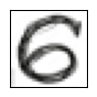

In [84]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/drive/MyDrive/LIA1_2024/content/images/six.jpg")

# Redimensiona para 28X28 pixels
nova_imagem = nova_imagem.resize((28, 28))

# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [85]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem.convert('L')) / 255.0

# Expande a dimensão do array para que ele tenha o formato (1, 28, 28, 1)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis=0)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis=-1)

# Fazendo a previsão!
previsoes = modelo_lia.predict(nova_imagem_array)

1/1 [==============================] - 0s 38ms/step


In [86]:
print(previsoes)

[[7.16494909e-03 2.43630272e-11 3.31405587e-08 1.58978693e-07
  3.69724296e-09 5.82866780e-02 9.32786763e-01 1.06643576e-13
  1.76141202e-03 1.38876928e-08]]


In [87]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [88]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: Six
